In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import time
warnings.filterwarnings('ignore')

In [2]:
df_churn = pd.read_csv('https://raw.githubusercontent.com/kieuthutran/Customer-Churn-Analysis/refs/heads/main/churn_prediction.csv')
df_churn.head(2)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869.0,0.0,20.0,Mobile Phone,3.0,7.0,E wallet,Female,4.0,4.0,Fashion,5.0,Married,3.0,0.0,26.0,5.0,16.0,NaN,230.0
1,52942.0,0.0,13.0,Computer,1.0,9.0,Cash on Delivery,Female,4.0,4.0,Fashion,3.0,Single,2.0,0.0,26.0,11.0,NaN,9.0,234.0


# 1.&nbsp;EDA

## 1.1. Data Overview

In [ ]:
df_churn.shape

(6630, 20)

In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6630 entries, 0 to 6629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   float64
 1   Churn                        5630 non-null   float64
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   float64
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   float64
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   float64
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

**Statistical summary of variables**

In [ ]:
cols = ['Tenure', 'CityTier', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'Complain']
def convert(df, cols):
  for col in cols:
    df[col] = df[col].astype('object')
  return df

convert(df_churn, cols)
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6630 entries, 0 to 6629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   float64
 1   Churn                        5630 non-null   float64
 2   Tenure                       5366 non-null   object 
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   object 
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   object 
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   object 
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
display(df_churn.describe())                   # numerical
display(df_churn.describe(exclude="number"))   # categorical

,CustomerID,Churn,WarehouseToHome,HourSpendOnApp,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5379.000000,5375.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,15.639896,2.931535,4.214032,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.531475,0.721926,2.583586,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,5.000000,0.000000,1.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,9.000000,2.000000,2.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,14.000000,3.000000,3.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,20.000000,3.000000,6.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,127.000000,5.000000,22.000000,26.000000,16.000000,16.000000,46.000000,325.000000


,Tenure,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain
count,5366.0,5630,5630.0,5630,5630,5630.0,5630,5630.0,5630,5630.0
unique,36.0,3,3.0,7,2,6.0,6,5.0,3,2.0
top,1.0,Mobile Phone,1.0,Debit Card,Male,4.0,Laptop & Accessory,3.0,Married,0.0
freq,690.0,2765,3666.0,2314,3384,2377.0,2050,1698.0,2986,4026.0


## 1.2. Missing/Duplicate Values

In [ ]:
df_churn.isna().mean().sort_values(ascending=False)

,0
DaySinceLastOrder,0.197134
OrderAmountHikeFromlastYear,0.190799
Tenure,0.190649
OrderCount,0.189744
CouponUsed,0.189442
HourSpendOnApp,0.189291
WarehouseToHome,0.188688
CustomerID,0.150830
MaritalStatus,0.150830
Complain,0.150830


In [ ]:
df_churn.dropna(how='all', inplace=True)
df_churn.isna().mean().sort_values(ascending=False)

,0
DaySinceLastOrder,0.054529
OrderAmountHikeFromlastYear,0.047069
Tenure,0.046892
OrderCount,0.045826
CouponUsed,0.045471
HourSpendOnApp,0.045293
WarehouseToHome,0.044583
CustomerID,0.000000
MaritalStatus,0.000000
Complain,0.000000


In [ ]:
df_churn['DaySinceLastOrder'] = df_churn['DaySinceLastOrder'].fillna(0)
df_churn['OrderAmountHikeFromlastYear'] = df_churn['OrderAmountHikeFromlastYear'].fillna(0)
df_churn['Tenure'] = df_churn['Tenure'].fillna(0)
df_churn['OrderCount'] = df_churn['OrderCount'].fillna(1)
df_churn['CouponUsed'] = df_churn['CouponUsed'].fillna(0)
df_churn['HourSpendOnApp'] = df_churn['HourSpendOnApp'].fillna(0)
df_churn['WarehouseToHome'] = df_churn['WarehouseToHome'].fillna(df_churn['WarehouseToHome'].median())
df_churn.isna().sum()

,0
CustomerID,0
Churn,0
Tenure,0
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,0
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0


In [ ]:
df_churn.shape

(5630, 20)

**There is no duplicate record in dataset**

In [ ]:
df_churn.duplicated().sum()

0

**Replace values**

In [ ]:
df_churn['PreferredLoginDevice'] = df_churn['PreferredLoginDevice'].str.replace('Mobile Phone', 'Phone')

df_churn['PreferredPaymentMode'] = df_churn['PreferredPaymentMode'].str.replace('COD', 'Cash on Delivery')
df_churn['PreferredPaymentMode'] = df_churn['PreferredPaymentMode'].str.replace('CC', 'Credit Card')

df_churn['PreferedOrderCat'] = df_churn['PreferedOrderCat'].str.replace('Mobile Phone', 'Phone')
df_churn['PreferedOrderCat'] = df_churn['PreferedOrderCat'].str.replace('Mobile', 'Phone')

## 1.3. Univariate Analysis

**Numerical**: WarehouseToHome, HourSpendOnApp, NumberOfAddress, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount


---


**Categorical**: Churn, Tenure, PreferredLoginDevice, CityTier, PreferredPaymentMode, Gender, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, Complain



**Numeric Values**

In [ ]:
num_cols = df_churn.select_dtypes(exclude=['object'])
num_cols.nunique()

,0
Churn,2
WarehouseToHome,34
HourSpendOnApp,6
NumberOfAddress,15
OrderAmountHikeFromlastYear,16
CouponUsed,17
OrderCount,16
DaySinceLastOrder,22
CashbackAmount,220


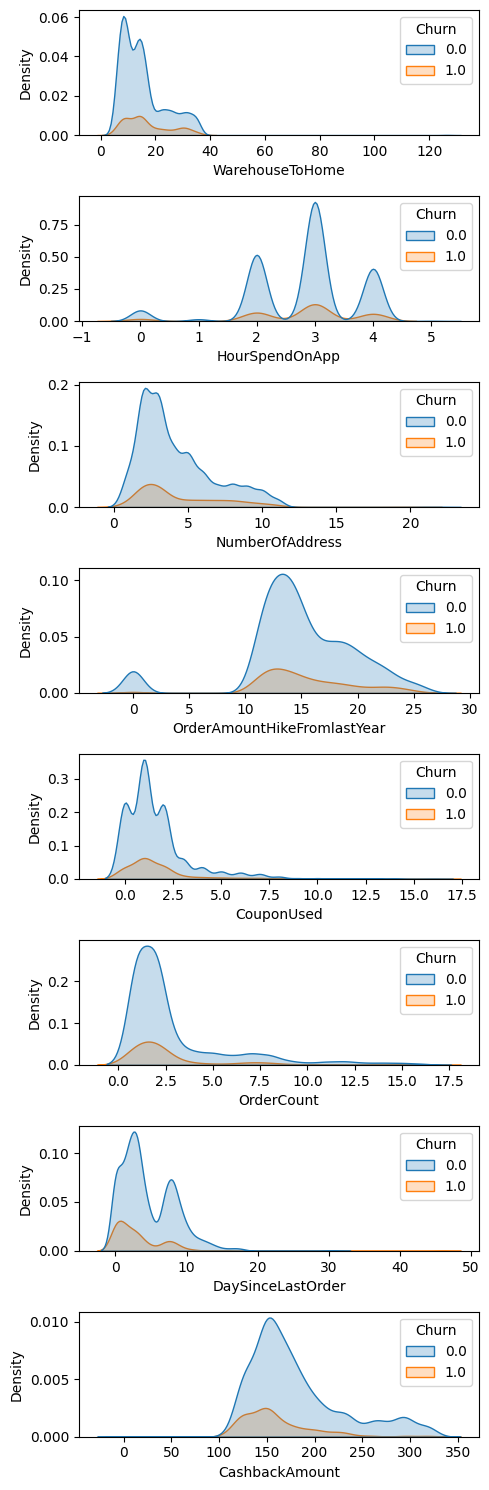

In [ ]:
cols = ['WarehouseToHome','HourSpendOnApp','NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']

plt.figure(figsize=(5, 15))

for i, col in enumerate(cols, 1):
    plt.subplot(len(cols), 1, i)
    sns.kdeplot(df_churn, x=col, hue='Churn', shade=True)

plt.tight_layout()
plt.show()

**Category Values**

In [ ]:
obj_cols = df_churn.select_dtypes(include=['object'])
obj_cols.nunique()

,0
Churn,2
Tenure,36
PreferredLoginDevice,2
CityTier,3
PreferredPaymentMode,5
Gender,2
NumberOfDeviceRegistered,6
PreferedOrderCat,5
SatisfactionScore,5
MaritalStatus,3


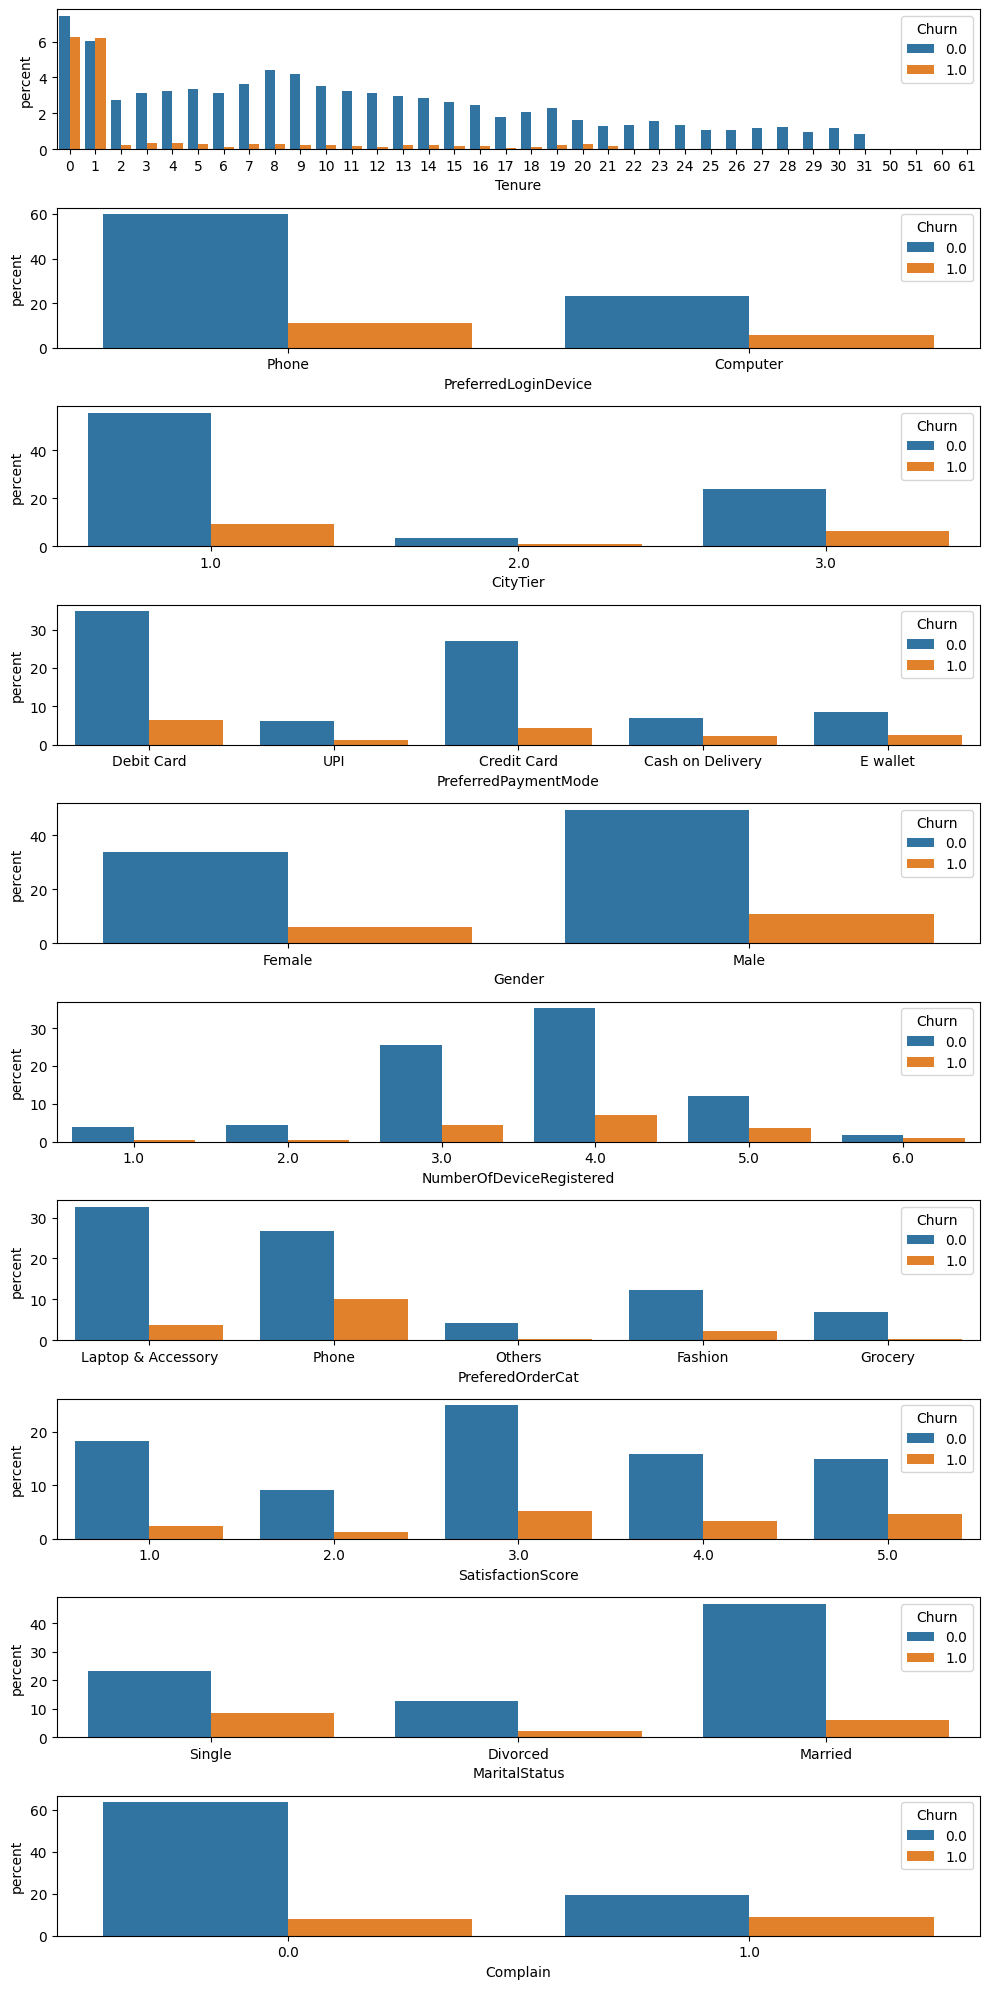

In [ ]:
# df_churn['Tenure'] = df_churn['Tenure'].fillna(0).astype('int')
cols = ['Tenure','PreferredLoginDevice','CityTier','PreferredPaymentMode','Gender','NumberOfDeviceRegistered','PreferedOrderCat','SatisfactionScore','MaritalStatus','Complain']
plt.figure(figsize=(10, 20))

for i, col in enumerate(cols, 1):
  plt.subplot(len(cols), 1, i)
  sns.countplot(df_churn, x=col, hue='Churn', stat='percent')

plt.tight_layout()
plt.show()

In [ ]:
df1 = df_churn[['PreferredPaymentMode']].value_counts().rename('TotalCount').reset_index()
df2 = df_churn.query("Churn==1")[['PreferredPaymentMode']].value_counts().rename('ChurnCount').reset_index()
df = df1.merge(df2, how='left', on='PreferredPaymentMode').fillna(0)
df['ChurnRatio'] = (df['ChurnCount'] + 1) / (df['TotalCount'] + 2)
df.sort_values('ChurnRatio', ascending=False)

,PreferredPaymentMode,TotalCount,ChurnCount,ChurnRatio
3,Cash on Delivery,514,128,0.250000
2,E wallet,614,140,0.228896
4,UPI,414,72,0.175481
0,Debit Card,2314,356,0.154145
1,Credit Card,1774,252,0.142455


In [ ]:
df1 = df_churn[['NumberOfDeviceRegistered']].value_counts().rename('TotalCount').reset_index()
df2 = df_churn.query("Churn==1")[['NumberOfDeviceRegistered']].value_counts().rename('ChurnCount').reset_index()
df = df1.merge(df2, how='left', on='NumberOfDeviceRegistered').fillna(0)
df['ChurnRatio'] = (df['ChurnCount'] + 1) / (df['TotalCount'] + 2)
df.sort_values('ChurnRatio', ascending=False)

,NumberOfDeviceRegistered,TotalCount,ChurnCount,ChurnRatio
5,6.0,162,56,0.347561
2,5.0,881,198,0.225368
0,4.0,2377,392,0.165195
1,3.0,1699,254,0.149912
3,2.0,276,26,0.097122
4,1.0,235,22,0.097046


In [ ]:
df1 = df_churn[['PreferedOrderCat']].value_counts().rename('TotalCount').reset_index()
df2 = df_churn.query("Churn==1")[['PreferedOrderCat']].value_counts().rename('ChurnCount').reset_index()
df = df1.merge(df2, how='left', on='PreferedOrderCat').fillna(0)
df['ChurnRatio'] = (df['ChurnCount'] + 1) / (df['TotalCount'] + 2)
df.sort_values('ChurnRatio', ascending=False)

,PreferedOrderCat,TotalCount,ChurnCount,ChurnRatio
0,Phone,2080,570,0.274256
2,Fashion,826,128,0.155797
1,Laptop & Accessory,2050,210,0.102827
4,Others,264,20,0.078947
3,Grocery,410,20,0.050971


In [ ]:
df1 = df_churn[['MaritalStatus']].value_counts().rename('TotalCount').reset_index()
df2 = df_churn.query("Churn==1")[['MaritalStatus']].value_counts().rename('ChurnCount').reset_index()
df = df1.merge(df2, how='left', on='MaritalStatus').fillna(0)
df['ChurnRatio'] = (df['ChurnCount'] + 1) / (df['TotalCount'] + 2)
df.sort_values('ChurnRatio', ascending=False)

,MaritalStatus,TotalCount,ChurnCount,ChurnRatio
1,Single,1796,480,0.267519
2,Divorced,848,124,0.147059
0,Married,2986,344,0.115462


**What are the patterns/behavior of churned users? What are your suggestions to the company to reduce churned users.**

* Low tenure --> Giảm giá khi đăng ký dùng dịch vụ trong thời gian dài (3 tháng, 6 tháng, 1 năm)
* Cash transaction --> Tặng voucher khi thanh toán bằng các phương thức không dùng tiền mặt
* Register multiple devices
* Preference category: Phone --> Gói bảo hành khi mua điện thoại, chương trình thu cũ đổi mới
* Single
* Complain --> Chăm sóc khách hàng thường xuyên (gmail, sms, điện thoại) để cải thiện những lý do khách hàng không hài lòng

## 1.4. Bivariate & Multivariate Analysis

<Axes: >

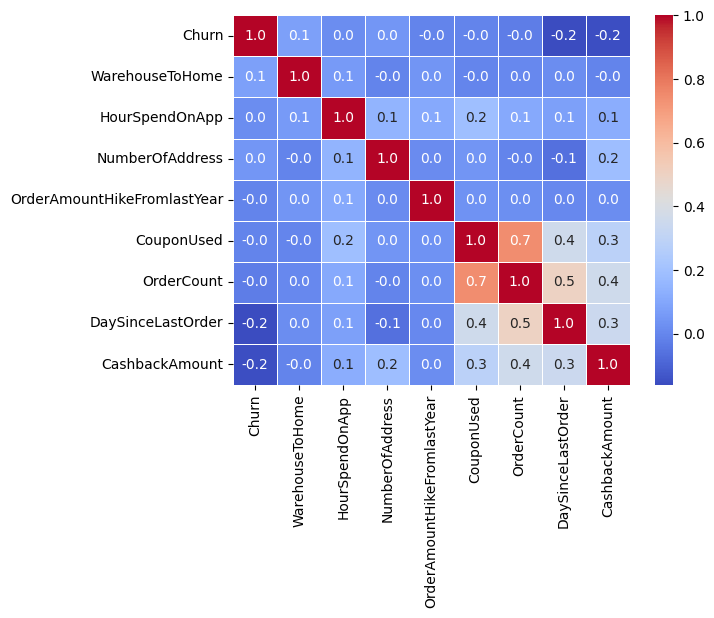

In [ ]:
corr = num_cols.corr()
sns.heatmap(corr, annot=True, fmt=".1f", cmap='coolwarm', linewidths=.5)

'CouponUsed' và 'OrderCount' có mối tương quan cao --> xem xét có cần loại bỏ 1 trong 2 biến trước khi đưa vào model

## 1.5. Outlier Detection

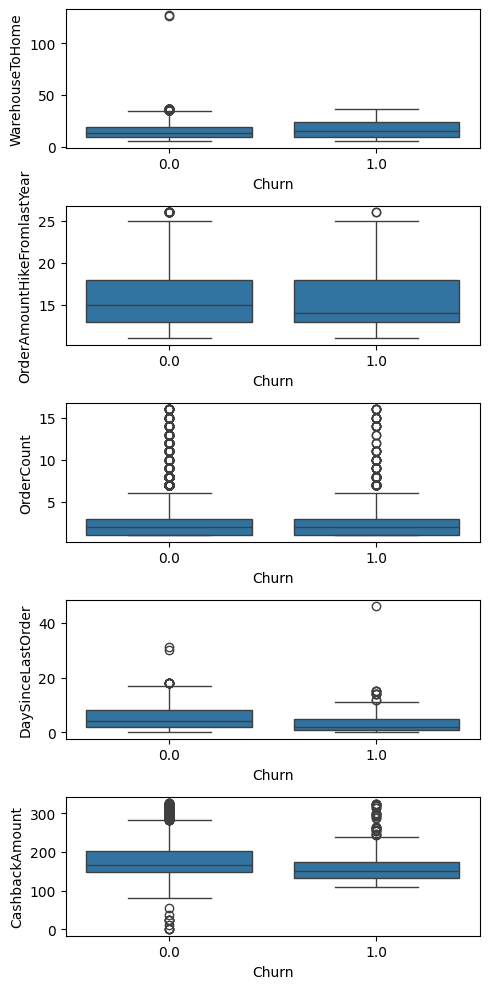

In [ ]:
cols = ['WarehouseToHome','OrderAmountHikeFromlastYear','OrderCount','DaySinceLastOrder','CashbackAmount']

plt.figure(figsize=(5, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(len(cols), 1, i)
    sns.boxplot(data=df_churn, x='Churn',y=num_cols[col])

plt.tight_layout()
plt.show()

## 1.6. Target Variable Analysis

In [ ]:
label_ratio = df_churn['Churn'].value_counts(normalize=True)
label_ratio

,proportion
Churn,
0.0,0.831616
1.0,0.168384


The ratio of label 1 on total is 16.8% (1-20%): **quite imbalanced** --> Still process ML model as normal. If the model doesn't as expect, we will return to handle imbalance by SMOTE or get more data.

# 2.&nbsp;Logistic Regression

## 2.1. Feature Transforming

In [ ]:
cate_columns = df_churn.loc[:, df_churn.dtypes == object].columns.tolist()

encoded_df = pd.get_dummies(df_churn, columns = cate_columns, drop_first=True)
encoded_df.head(2)

,CustomerID,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,...,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Others,PreferedOrderCat_Phone,SatisfactionScore_2.0,SatisfactionScore_3.0,SatisfactionScore_4.0,SatisfactionScore_5.0,MaritalStatus_Married,MaritalStatus_Single,Complain_1.0
0,50001.0,1.0,4.0,6.0,3.0,9.0,11.0,1.0,1.0,5.0,...,True,False,False,True,False,False,False,False,True,True
1,50002.0,1.0,0.0,8.0,3.0,7.0,15.0,0.0,1.0,0.0,...,False,False,True,False,True,False,False,False,True,True


In [ ]:
from sklearn.model_selection import train_test_split

x = encoded_df.drop(['Churn'], axis=1)
y = encoded_df['Churn']

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print(f"Number data of train set: {len(x_train)}")
print(f"Number data of validate set: {len(x_val)}")
print(f"Number data of test set: {len(x_test)}")

Number data of train set: 3941
Number data of validate set: 844
Number data of test set: 845


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

## 2.2. Model Training

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.94       715
         1.0       0.86      0.43      0.57       130

    accuracy                           0.90       845
   macro avg       0.88      0.71      0.76       845
weighted avg       0.90      0.90      0.89       845



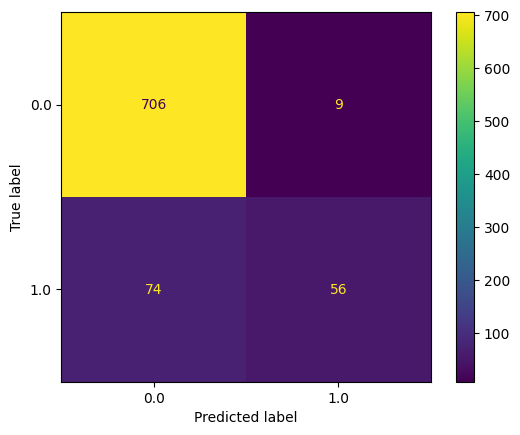

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

churn_logis = LogisticRegression(random_state=0)
churn_logis.fit(x_train_scaled, y_train)

y_pred_val = churn_logis.predict(x_val_scaled)
y_pred_train = churn_logis.predict(x_train_scaled)
y_pred_test = churn_logis.predict(x_test_scaled)

print(classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test, labels = churn_logis.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = churn_logis.classes_)
disp.plot()

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       715
         1.0       0.98      0.70      0.82       130

    accuracy                           0.95       845
   macro avg       0.96      0.85      0.89       845
weighted avg       0.95      0.95      0.95       845



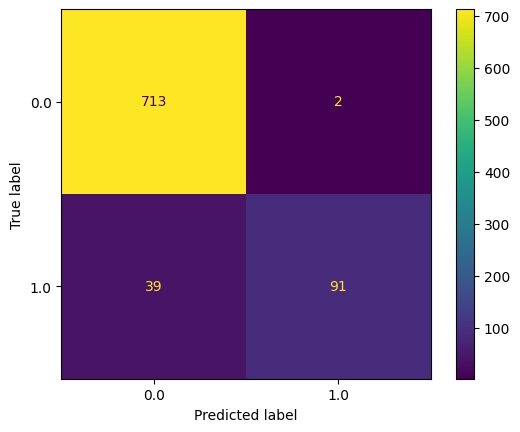

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

churn_rand = RandomForestClassifier(max_depth=15, random_state=0, n_estimators = 100)

churn_rand.fit(x_train_scaled, y_train)

y_ranf_pre_train = churn_rand.predict(x_train_scaled)
y_ranf_pre_val = churn_rand.predict(x_val_scaled)
y_pred = churn_rand.predict(x_test_scaled)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels = churn_rand.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = churn_rand.classes_)
disp.plot()

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       715
         1.0       0.92      0.86      0.89       130

    accuracy                           0.97       845
   macro avg       0.95      0.92      0.93       845
weighted avg       0.97      0.97      0.97       845



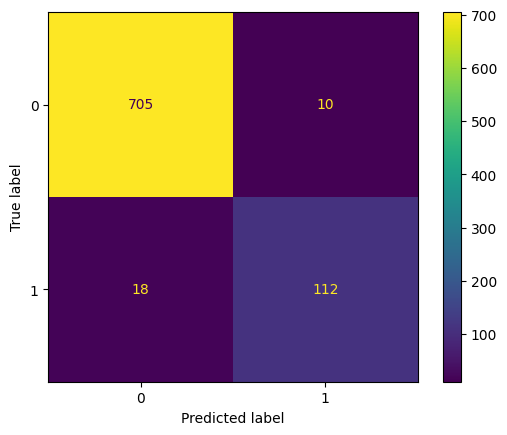

In [ ]:
# XGBOOST
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model_xgb = xgb.XGBClassifier(random_state=42, n_estimators=200)
model_xgb.fit(x_train, y_train)

y_pred = model_xgb.predict(x_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels = model_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model_xgb.classes_)
disp.plot()

## 2.3. Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
# learning rate, regularization strength, batch size, and number of iterations

grid_search = GridSearchCV(model_xgb, param_grid, cv=5, scoring='balanced_accuracy')


grid_search.fit(x_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_clf = grid_search.best_estimator_
accuracy = best_clf.score(x_test, y_test)
print("Test set accuracy: ", accuracy)

Best Parameters:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test set accuracy:  0.9715976331360947


# 3.&nbsp;K-Means Clustering

In [ ]:
df_clus = df_churn[df_churn['Churn'] == 1]

In [ ]:
df_clus_encoding = pd.get_dummies(df_clus, columns = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus'])

In [ ]:
# df_clus.set_index('CustomerID', inplace=True)
# df_clus.head(2)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
50001.0,1.0,4.0,0,3.0,6.0,2,0,3.0,3.0,2,2.0,0,9.0,1.0,11.0,1.0,1.0,5.0,160.0
50002.0,1.0,0.0,0,1.0,8.0,4,1,3.0,4.0,3,3.0,0,7.0,1.0,15.0,0.0,1.0,0.0,121.0


In [ ]:
# drops = ['CustomerID']
# df_clus = df_clus.drop(drops, axis = 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df_clus_encoding)

df_clus_scaled = scaler.transform(df_clus_encoding)

In [ ]:
pd.DataFrame(df_clus_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.000000,0.0,0.190476,1.0,0.032258,0.75,0.4,0.25,0.421053,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.000178,0.0,0.000000,0.0,0.096774,0.75,0.6,0.50,0.315789,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.000356,0.0,0.000000,0.0,0.806452,0.50,0.6,0.50,0.263158,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.000534,0.0,0.000000,1.0,0.322581,0.50,0.6,1.00,0.368421,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.000712,0.0,0.000000,0.0,0.225806,0.00,0.4,1.00,0.105263,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


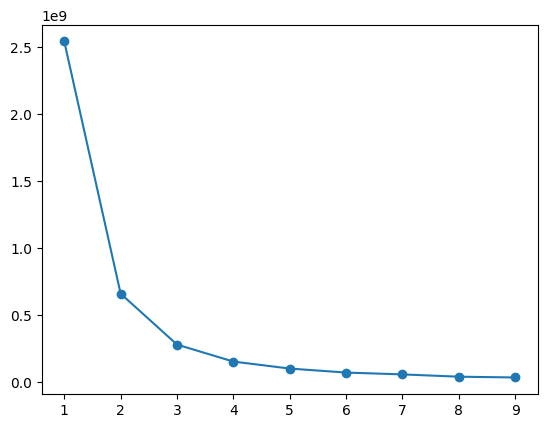

In [ ]:
from sklearn.cluster import KMeans

ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_clus_encoding)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.show()

**As can be seen from the plot, the elbow-like shape occurs at k=3.**

In [ ]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_clus_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
labels = model.labels_
labels = pd.DataFrame(labels, columns=['Cluster'])
df_clus = pd.concat([df_clus, labels], axis=1)
df_clus.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Cluster
0,50001.0,1.0,4.0,Phone,3.0,6.0,Debit Card,Female,3.0,3.0,...,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,160.0,2.0
1,50002.0,1.0,0.0,Phone,1.0,8.0,UPI,Male,3.0,4.0,...,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,121.0,1.0
2,50003.0,1.0,0.0,Phone,1.0,30.0,Debit Card,Male,2.0,4.0,...,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.0,1.0
3,50004.0,1.0,0.0,Phone,3.0,15.0,Debit Card,Male,2.0,4.0,...,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.0,2.0
4,50005.0,1.0,0.0,Phone,1.0,12.0,Credit Card,Male,0.0,3.0,...,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,130.0,1.0


In [ ]:
df_clus.groupby('Cluster').size()

,0
Cluster,
0.0,280
1.0,358
2.0,310


In [ ]:
df_clus.groupby('Cluster').describe(exclude="number")

PreferredLoginDevice                    PreferredPaymentMode         \
                       count unique    top freq                count unique   
Cluster                                                                       
0.0                       56      2  Phone   34                   56      5   
1.0                       69      2  Phone   44                   69      5   
2.0                       57      2  Phone   40                   57      5   

                         Gender                   PreferedOrderCat         \
                top freq  count unique   top freq            count unique   
Cluster                                                                     
0.0      Debit Card   29     56      2  Male   31               56      5   
1.0      Debit Card   20     69      2  Male   39               69      5   
2.0      Debit Card   21     57      2  Male   40               57      5   

                    MaritalStatus                      
           top freq         count unique     top freq  
Cluster                                                
0.0      Phone   40            56      3  Single   28  
1.0      Phone   43            69      3  Single   41  
2.0      Phone   26            57      3  Single   28

In [ ]:
# from sklearn.metrics import silhouette_score

# silhouette = round(silhouette_score(df_clus, model.labels_),3)
# print(silhouette)

-0.017


In [ ]:
df_clus[df_clus['Cluster'] == 0]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Cluster
5,50006.0,1.0,0.0,Computer,1.0,22.0,Debit Card,Female,3.0,5.0,...,5.0,Single,2.0,1.0,22.0,4.0,6.0,7.0,139.0,0.0
10,50011.0,1.0,4.0,Phone,1.0,18.0,Cash on Delivery,Female,2.0,3.0,...,3.0,Divorced,2.0,0.0,0.0,9.0,15.0,8.0,295.0,0.0
16,50017.0,1.0,0.0,Computer,1.0,12.0,Debit Card,Female,0.0,4.0,...,2.0,Single,2.0,1.0,18.0,1.0,1.0,0.0,129.0,0.0
19,50020.0,1.0,19.0,Phone,1.0,20.0,Debit Card,Female,3.0,3.0,...,4.0,Divorced,10.0,1.0,18.0,1.0,4.0,3.0,150.0,0.0
21,50022.0,1.0,20.0,Phone,1.0,29.0,Credit Card,Female,3.0,3.0,...,2.0,Divorced,2.0,0.0,12.0,11.0,15.0,6.0,203.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


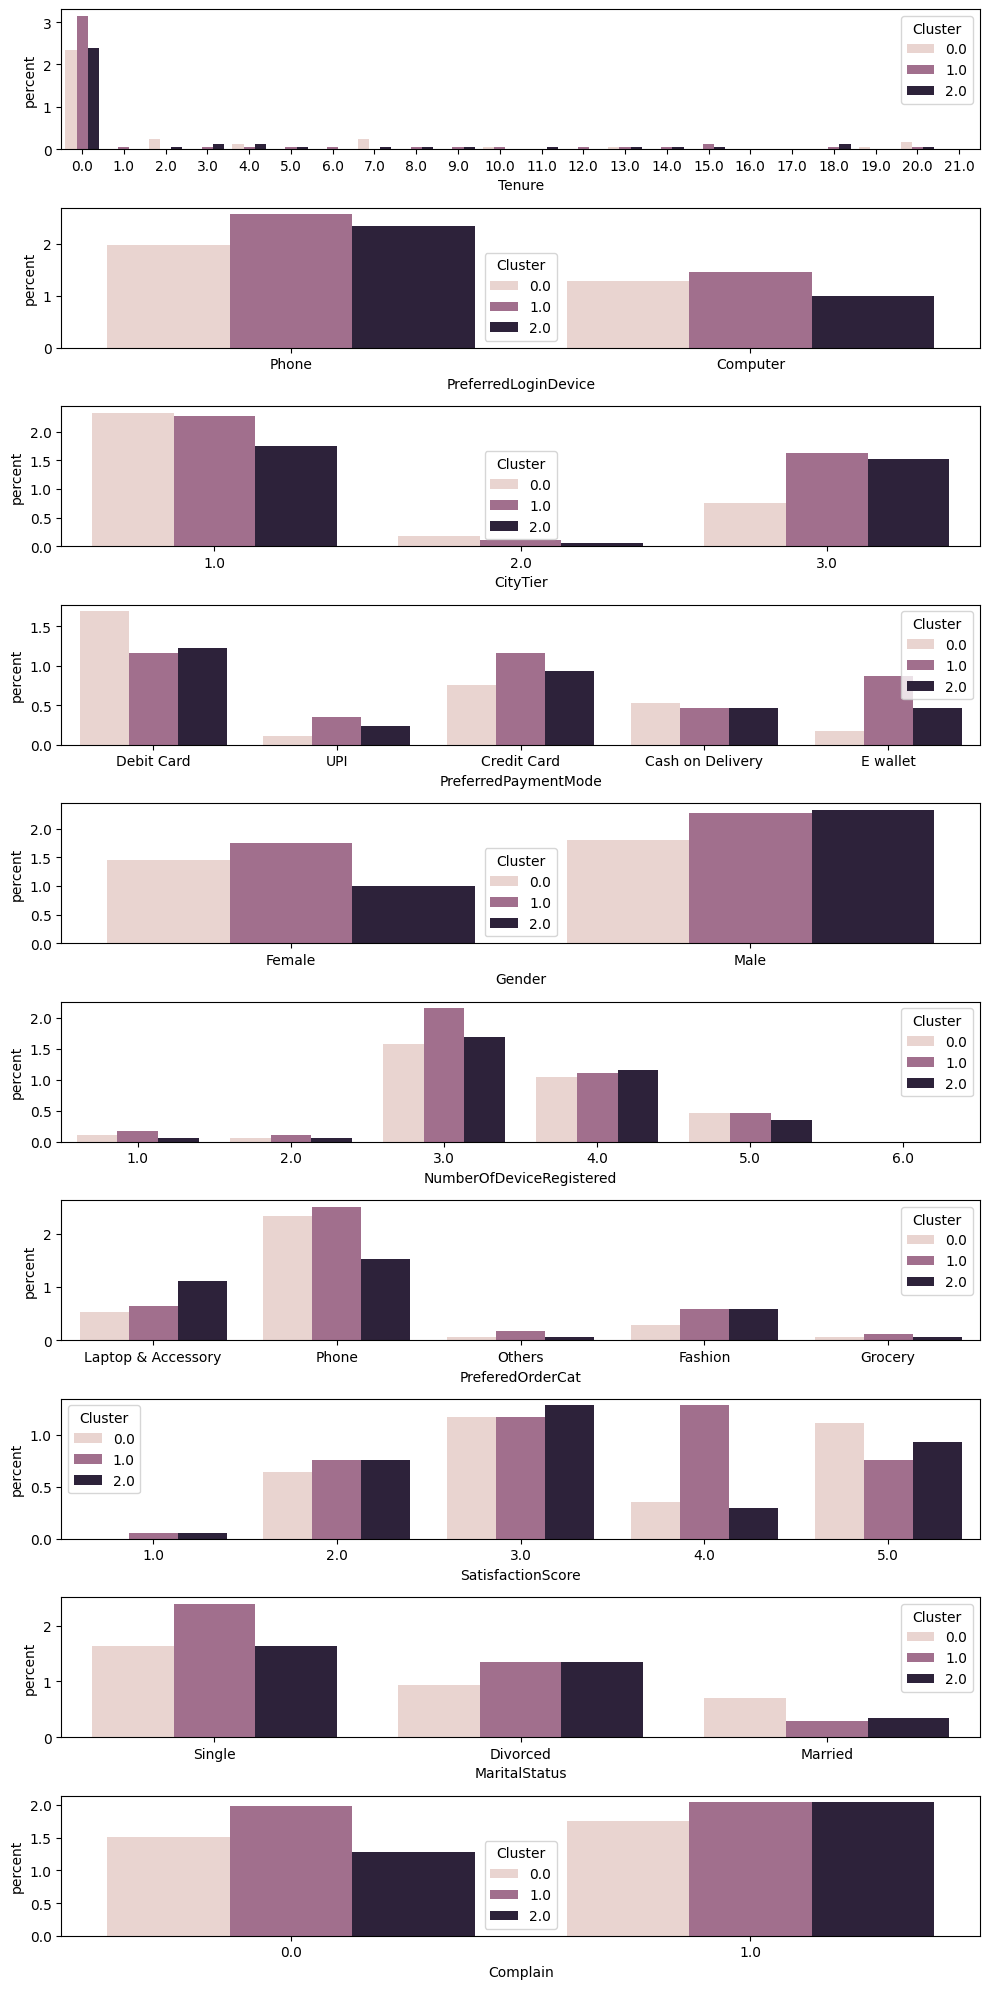

In [ ]:
cols = ['Tenure','PreferredLoginDevice','CityTier','PreferredPaymentMode','Gender','NumberOfDeviceRegistered','PreferedOrderCat','SatisfactionScore','MaritalStatus','Complain']
plt.figure(figsize=(10, 20))

for i, col in enumerate(cols, 1):
  plt.subplot(len(cols), 1, i)
  sns.countplot(df_clus, x=col, hue='Cluster', stat='percent')

plt.tight_layout()
plt.show()